In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


Memuat data

In [2]:
df = pd.read_csv('train.csv')
df.tail()

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
420,2020-09-26,4.692000e+08,-226400000.0,0.000000e+00,0.000000e+00,3.0,6.770562e+11,7.984164e+11,1.234267e+10,7.260305e+11,2.978684e+11,1.123736e+13,5.085800e+09
421,2020-09-27,5.272500e+08,-618750000.0,6.466720e+10,-7.829833e+10,3.0,8.005756e+11,7.979421e+11,1.226298e+10,7.243814e+11,2.978684e+11,1.122373e+13,4.994300e+09
422,2020-09-28,7.438000e+08,-556200000.0,1.264345e+11,-8.203374e+10,3.0,1.531154e+12,7.961238e+11,1.521195e+10,7.234264e+11,2.978684e+11,1.126813e+13,5.181900e+09
423,2020-09-29,1.009250e+09,-772100000.0,1.548627e+11,-7.443120e+10,3.0,8.638740e+11,7.731039e+11,1.320539e+10,7.201773e+11,2.978684e+11,1.134856e+13,5.419050e+09
424,2020-09-30,6.861000e+08,-833250000.0,1.487817e+11,-8.860700e+10,3.0,7.373418e+11,7.743742e+11,1.311528e+10,7.540607e+11,2.759476e+11,1.140874e+13,5.271900e+09


## Membangun Model kas_kantor

In [3]:
df_k = df[['periode','kas_kantor']]
df_k.columns = ['ds','y']

In [4]:
df_k.ds = pd.to_datetime(df_k.ds)
df_k.tail()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ds,y
420,2020-09-26,1.123736e+13
421,2020-09-27,1.122373e+13
422,2020-09-28,1.126813e+13
423,2020-09-29,1.134856e+13
424,2020-09-30,1.140874e+13


Menampilkan plot kas_kantor

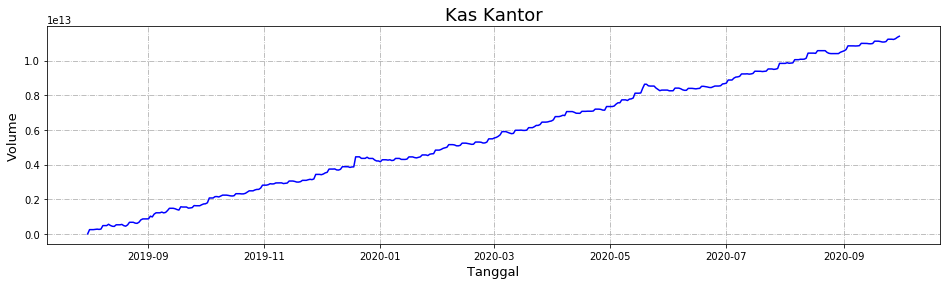

In [5]:
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

plt.plot(df_k.ds, df_k.y, 'b')

plt.title('Kas Kantor', fontsize=18)
plt.ylabel('Volume', fontsize=13)
plt.xlabel('Tanggal', fontsize=13)

plt.show()

In [ ]:
prophet = Prophet(changepoint_prior_scale=0.045, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode='multiplicative')
prophet = prophet.add_country_holidays(country_name = 'ID')

In [7]:
_ = prophet.fit(df_k)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
C:\Users\HP\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
C:\Users\HP\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [8]:
build_forecast_k = prophet.make_future_dataframe(periods=31, freq='D')

In [9]:
forecast_k = prophet.predict(build_forecast_k)

C:\Users\HP\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
C:\Users\HP\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)


In [10]:
forecast_k = forecast_k[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]

Menampilkan plot model

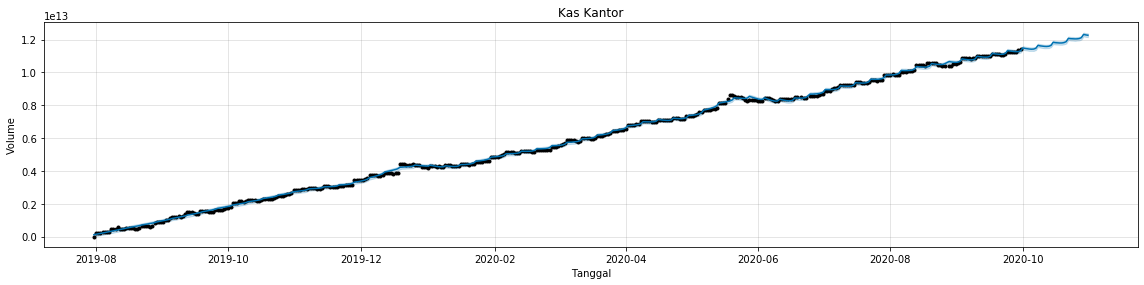

In [11]:
prophet.plot(forecast_k, xlabel='Tanggal', ylabel='Volume', figsize=(16,4))
plt.title('Kas Kantor')
plt.show()

In [12]:
forecast_k.tail()

,ds,yhat,yhat_upper,yhat_lower
451,2020-10-27,1.206321e+13,1.217036e+13,1.194939e+13
452,2020-10-28,1.211975e+13,1.221909e+13,1.200262e+13
453,2020-10-29,1.231382e+13,1.242673e+13,1.219697e+13
454,2020-10-30,1.228574e+13,1.239220e+13,1.216631e+13
455,2020-10-31,1.226521e+13,1.237493e+13,1.215555e+13


## Membangun model di kas_echannel 

Membuat dataframe kas_echannel

In [13]:
df_e = df[['periode', 'kas_echannel']]
df_e.columns = ['ds','y']

In [14]:
df_e.ds = pd.to_datetime(df_e.ds)
df_e.tail()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ds,y
420,2020-09-26,5.085800e+09
421,2020-09-27,4.994300e+09
422,2020-09-28,5.181900e+09
423,2020-09-29,5.419050e+09
424,2020-09-30,5.271900e+09


Menampilkan plot kas_echannel

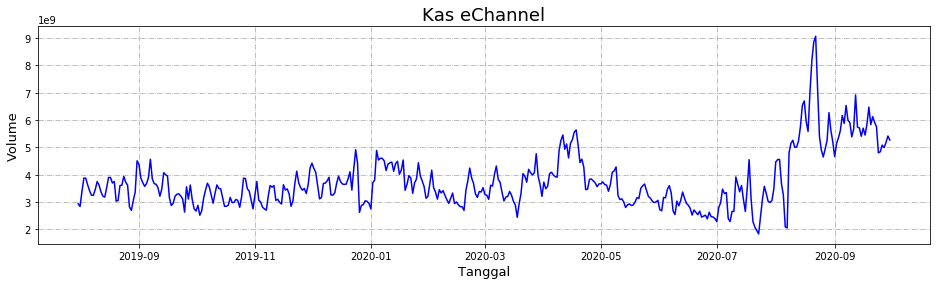

In [15]:
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

plt.plot(df_e.ds, df_e.y, 'b')

plt.title('Kas eChannel', fontsize=18)
plt.ylabel('Volume', fontsize=13)
plt.xlabel('Tanggal', fontsize=13)

plt.show()

Membangun model

In [16]:
prophet = Prophet(changepoint_prior_scale=0.045, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True, seasonality_mode='multiplicative')
prophet = prophet.add_country_holidays(country_name = 'ID')

In [17]:
_ = prophet.fit(df_e)

C:\Users\HP\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
C:\Users\HP\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [18]:
build_forecast_e = prophet.make_future_dataframe(periods=31, freq='D')

In [19]:
forecast_e = prophet.predict(build_forecast_e)

C:\Users\HP\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
C:\Users\HP\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)


In [20]:
forecast_e = forecast_e[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]

Menampilkan plot model

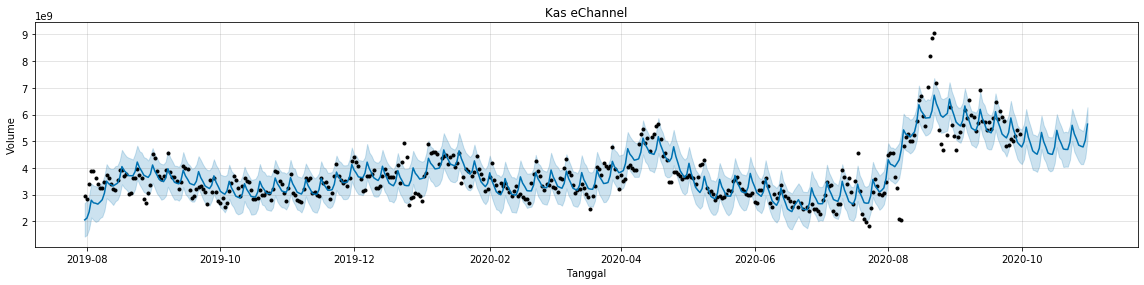

In [21]:
prophet.plot(forecast_e, xlabel='Tanggal', ylabel='Volume', figsize=(16,4))
plt.title('Kas eChannel')
plt.show()

In [22]:
forecast_e.tail()

,ds,yhat,yhat_upper,yhat_lower
451,2020-10-27,4.853073e+09,5.476412e+09,4.252469e+09
452,2020-10-28,4.812473e+09,5.427147e+09,4.139505e+09
453,2020-10-29,4.784047e+09,5.373859e+09,4.138280e+09
454,2020-10-30,5.031073e+09,5.675319e+09,4.385000e+09
455,2020-10-31,5.639443e+09,6.272442e+09,5.053831e+09


## Membuat File Submisi 

Membuat tiga file submisi yang terdiri dari:

- huruf d untuk yhat
- huruf e untuk yhat_upper
- huruf f untuk yhat_lower

Alasan membuat tiga file untuk submisi adalah memperbesar peluang mendapatkan prediksi paling baik. Kolom y_hat adalah prediksi utama, namun fungsi dari yhat_upper dan yhat_lower adalah sebagai range prediksi alternatif saat yhat kurang akurat prediksinya.

In [23]:
submission = pd.read_csv('sample_submission.csv')
submission.iloc[:31, 1] = forecast_k.iloc[425:,1]
submission.iloc[31:, 1] = forecast_e.iloc[425:,1]
submission.to_csv('submission_d.csv', index=False)